<a href="https://colab.research.google.com/github/Siddharth-736/Light_Field_Imaging_DAN/blob/main/Light_Field_Imaging_DAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow:Basics


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
print(tf.version)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
#@title Creating Tensors
string = tf.Variable("this is a string",tf.string)
number = tf.Variable(324,tf.int32)
floating = tf.Variable(1.65842,tf.float64)


##Rank/Degree of Tensors
Rank of a tensor signifies the number of axis/dimension of a tensor

In [ ]:
rank_1_tensor = tf.Variable([1,2,3,4],dtype = tf.int32)
rank_2_tensor = tf.Variable([[1,2,3],[4,5,6]],tf.int32)
rank_3_tensor = tf.ones([2,3,3],tf.int32)

In [ ]:
print(rank_1_tensor)
print(rank_2_tensor)
print(rank_3_tensor)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>
tf.Tensor(
[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]], shape=(2, 3, 3), dtype=int32)


In [ ]:
#@title Determining rank of a tensor
print(tf.rank(rank_1_tensor))
print(tf.rank(rank_2_tensor))
print(tf.rank(rank_3_tensor))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


## Shape of Tensors
Shape of a tensor is simply the number of elements that exist in each dimension

In [ ]:
tensor_a = tf.Variable([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]],tf.int64)
display(tensor_a)
print(tf.rank(tensor_a))
print(tensor_a.shape)

<tf.Variable 'Variable:0' shape=(2, 2, 3) dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

tf.Tensor(3, shape=(), dtype=int32)
(2, 2, 3)


## Changing Shape
The number of elements in a tensor is the product of sizes of all it's shapes. There are often many shapes that have the same number of elements, making it convenient to be able to change the shape of a tensor.

In [ ]:
tensor1 = tf.ones([1,2,3]) #Tensor of rank 3, conttaning 6 elements
tensor2= tf.reshape(tensor1,[2,3,1]) #Reshaping the above tensor to [2,3,1]
tensor3 = tf.reshape(tensor2,[3,-1]) #-1 tells the tensor to calculate the dimension of the tensor given 3 as one of the dimension
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


## Slicing Tensors
To slice elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value references a different dimension of a tensor


In [ ]:
matrix=[[1,2,3,4,5],
        [6,7,8,9,10],
        [11,12,13,14,15],
        [16,17,18,19,20],
        [21,22,23,24,25]]
tensor_4 = tf.Variable(matrix,tf.int64)
print(tensor_4)
print(tf.rank(tensor_4))
print(tensor_4.shape)  

<tf.Variable 'Variable:0' shape=(5, 5) dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]], dtype=int32)>
tf.Tensor(2, shape=(), dtype=int32)
(5, 5)


In [ ]:
#@title Slicing on tensor_4
first_ele = tensor_4[0,0].numpy()
print(first_ele)
first_row = tensor_4[0,:].numpy()
print(first_row)
first_col = tensor_4[:,0].numpy()
print(first_col)
col_1_in_row_2_and_3 = tensor_4[1:3,0].numpy()
print(col_1_in_row_2_and_3)

1
[1 2 3 4 5]
[ 1  6 11 16 21]
[ 6 11]


In [ ]:
import tensorflow as tf
#@title Practice
x = tf.Variable([1,2,3,4],dtype = tf.int32)
print(tf.rank(x))

tf.Tensor(1, shape=(), dtype=int32)


# Regression Model
One layer model with one neuron and one input 



In [ ]:
#Defining and compiling the model using suitable optimizer and loss function
model = tf.keras.Sequential([keras.layers.Dense(units = 1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')


In [ ]:
#Input data
X = np.array([-1,0,1,2,3,4],dtype = float)
Y = np.array([-3,-1,1,3,5,7],dtype = float)


In [ ]:
#Model Fitting
model.fit(X,Y, epochs = 500)

In [ ]:
#Predicting new value
print(model.predict([10]))

1/1 [==============================] - 0s 96ms/step
[[18.98019]]


In [ ]:
#@title Housing price prediction
model_house = tf.keras.Sequential([tf.keras.layers.Dense(units = 1,input_shape = [1])])
model_house.compile(optimizer = 'sgd',loss='mean_squared_error')
X_house = np.array([1,2,3,4,5,6],dtype = float)
Y_house= np.array([1,1.5,2,2.5,3,3.5],dtype = float)
model_house.fit(X_house,Y_house,epochs = 1000)


Epoch 1/1000
1/1 [==============================] - 0s 371ms/step - loss: 19.8084
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.1741
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 4.2522
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.9742
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9198
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4317
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2058
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1012
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0527
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0303
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0198
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0150
Epoch 13/1000
1/1 [=====================

array([[4.00405]], dtype=float32)

In [ ]:
#Prediction
model_house.predict([7])

1/1 [==============================] - 0s 35ms/step


array([[4.00405]], dtype=float32)

# Computer Vision
Image classififcation problem using MNIST_fashion Dataset

In [ ]:
#@title Loading Data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_label),(test_images,test_label) = mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


3
[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0
  106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189
  212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202
  198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207
  200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197
  201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198
  210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205
  208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215
  211 232 114   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0  32 235 200 206 208 205 

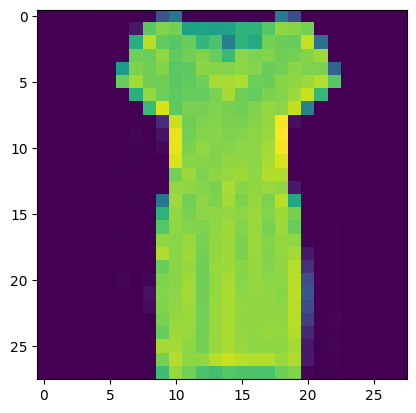

In [ ]:
plt.imshow(training_images[20])
print(training_label[20])
print(training_images[20])


In [ ]:
#For Neural network to be applied easily it's better to normalize the data between [0,1]
training_images = training_images/255.0
test_images = test_images/255.0 #Divided by 255 as highest gray level is 255 or 8-bit


In [ ]:
#@title Model Creation
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128,activation = tf.nn.relu),#Activation function is Relu. applied to each of the neuron
                            tf.keras.layers.Dense(10,activation = tf.nn.softmax)]) #Activation function is Softmax, applied to entire layer giving out 10 values

model.compile(optimizer=tf.optimizers.Adam(),loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_label,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5006 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3749 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2955 - accuracy: 0.8902


In [ ]:
#Testing the Data
model.evaluate(test_images,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8616


[0.3966643512248993, 0.8615999817848206]